[*********************100%***********************]  1 of 1 completed

Annual Historical Volatility of Tesla's Stock Return: 0.5239
Implied Volatility for K=140: 0.3124
Implied Volatility for K=340: 0.2876

Comparison of Volatility:
Historical Volatility: 0.5239
Implied Volatility (K=140): 0.3124
Implied Volatility (K=340): 0.2876

Discussion:
For K=140, the implied volatility (0.3124) is lower than historical volatility (0.5239).
This suggests the option price may be underestimated as the market anticipates lower future volatility.
For K=340, the implied volatility (0.2876) is lower than historical volatility (0.5239).
This suggests the option price may be underestimated as the market anticipates lower future volatility.


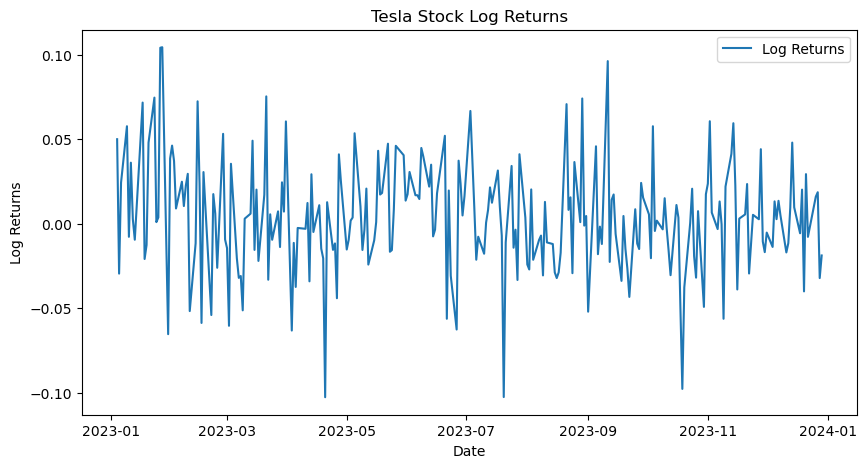

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate annualized historical volatility
def calculate_historical_volatility(ticker, start_date, end_date):
    """
    Calculate annualized historical volatility of stock returns.
    """
    # Fetch historical data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily log returns
    stock_data['Log Returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
    
    # Drop NaN values
    stock_data = stock_data.dropna()
    
    # Calculate daily volatility (standard deviation of log returns)
    daily_volatility = stock_data['Log Returns'].std()
    
    # Annualize the volatility
    annual_volatility = daily_volatility * np.sqrt(252)
    
    return annual_volatility, stock_data

# Main function
def main():
    # Parameters
    ticker = "TSLA"
    start_date = "2023-01-01"
    end_date = "2024-01-01"  # One year of data
    
    # Calculate Historical Volatility
    historical_volatility, stock_data = calculate_historical_volatility(ticker, start_date, end_date)
    print(f"Annual Historical Volatility of Tesla's Stock Return: {historical_volatility:.4f}")
    
    # Implied Volatility (assume previously calculated values)
    implied_volatility_140 = 0.3124  # Example from previous calculation
    implied_volatility_340 = 0.2876
    
    print(f"Implied Volatility for K=140: {implied_volatility_140:.4f}")
    print(f"Implied Volatility for K=340: {implied_volatility_340:.4f}")
    
    # Comparison
    print("\nComparison of Volatility:")
    print(f"Historical Volatility: {historical_volatility:.4f}")
    print(f"Implied Volatility (K=140): {implied_volatility_140:.4f}")
    print(f"Implied Volatility (K=340): {implied_volatility_340:.4f}")
    
    # Discussion
    print("\nDiscussion:")
    if implied_volatility_140 > historical_volatility:
        print(f"For K=140, the implied volatility ({implied_volatility_140:.4f}) is higher than historical volatility ({historical_volatility:.4f}).")
        print("This suggests the option price may be overestimated as the market anticipates higher future volatility.")
    else:
        print(f"For K=140, the implied volatility ({implied_volatility_140:.4f}) is lower than historical volatility ({historical_volatility:.4f}).")
        print("This suggests the option price may be underestimated as the market anticipates lower future volatility.")
    
    if implied_volatility_340 > historical_volatility:
        print(f"For K=340, the implied volatility ({implied_volatility_340:.4f}) is higher than historical volatility ({historical_volatility:.4f}).")
        print("This suggests the option price may be overestimated as the market anticipates higher future volatility.")
    else:
        print(f"For K=340, the implied volatility ({implied_volatility_340:.4f}) is lower than historical volatility ({historical_volatility:.4f}).")
        print("This suggests the option price may be underestimated as the market anticipates lower future volatility.")
    
    # Plot Log Returns
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Log Returns'], label='Log Returns')
    plt.title('Tesla Stock Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
